In [1]:
# Cellule 1 : Imports et configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration d'affichage
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

print("Configuration terminée")

Configuration terminée


In [2]:
# Cellule 2 : Chargement des données principales
import os

# Chemin vers les données
data_path = "../data/"

# Charger application_train.csv (le plus important)
print("Chargement de application_train.csv...")
app_train = pd.read_csv(data_path + "application_train.csv")

print(f"Forme des données : {app_train.shape}")
print(f"Mémoire utilisée : {app_train.memory_usage().sum() / 1024**2:.1f} MB")

Chargement de application_train.csv...
Forme des données : (307511, 122)
Mémoire utilisée : 286.2 MB


In [3]:
# Cellule 3 : Première exploration
print("=== APERÇU DES DONNÉES ===")
print(f"Nombre de lignes : {app_train.shape[0]:,}")
print(f"Nombre de colonnes : {app_train.shape[1]:,}")
print("\n=== VARIABLE CIBLE ===")
print("Distribution de TARGET :")
print(app_train['TARGET'].value_counts())
print(f"\nPourcentage de défaut : {app_train['TARGET'].mean()*100:.2f}%")

print("\n=== PREMIÈRES LIGNES ===")
app_train.head()

=== APERÇU DES DONNÉES ===
Nombre de lignes : 307,511
Nombre de colonnes : 122

=== VARIABLE CIBLE ===
Distribution de TARGET :
TARGET
0    282686
1     24825
Name: count, dtype: int64

Pourcentage de défaut : 8.07%

=== PREMIÈRES LIGNES ===


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Cellule 4 : Types de données et valeurs manquantes
print("=== TYPES DE DONNÉES ===")
print(app_train.dtypes.value_counts())

print("\n=== VALEURS MANQUANTES (TOP 10) ===")
missing = app_train.isnull().sum()
missing_pct = (missing / len(app_train)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0].head(10))

=== TYPES DE DONNÉES ===
float64    65
int64      41
object     16
Name: count, dtype: int64

=== VALEURS MANQUANTES (TOP 10) ===
                          Missing_Count  Missing_Percentage
COMMONAREA_MEDI                  214865           69.872297
COMMONAREA_AVG                   214865           69.872297
COMMONAREA_MODE                  214865           69.872297
NONLIVINGAPARTMENTS_MODE         213514           69.432963
NONLIVINGAPARTMENTS_AVG          213514           69.432963
NONLIVINGAPARTMENTS_MEDI         213514           69.432963
FONDKAPREMONT_MODE               210295           68.386172
LIVINGAPARTMENTS_MODE            210199           68.354953
LIVINGAPARTMENTS_AVG             210199           68.354953
LIVINGAPARTMENTS_MEDI            210199           68.354953


=== DÉSÉQUILIBRE DES CLASSES ===
Classe 0 (bon client) : 282,686 (91.9%)
Classe 1 (défaut) : 24,825 (8.1%)
Ratio déséquilibre : 1:11.4


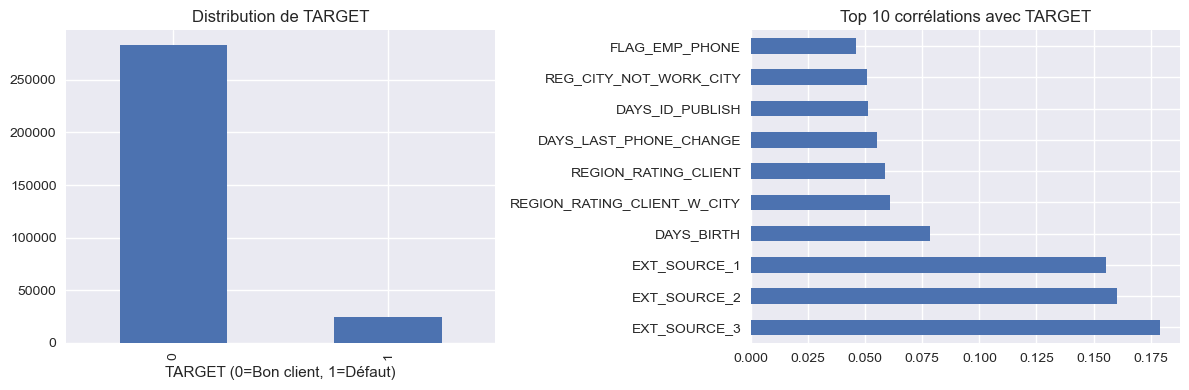


Top 10 des corrélations avec TARGET :
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
Name: TARGET, dtype: float64


In [6]:
# Cellule 5 corrigée : Analyse de la variable cible et corrélations
print("=== DÉSÉQUILIBRE DES CLASSES ===")
target_counts = app_train['TARGET'].value_counts()
print(f"Classe 0 (bon client) : {target_counts[0]:,} ({target_counts[0]/len(app_train)*100:.1f}%)")
print(f"Classe 1 (défaut) : {target_counts[1]:,} ({target_counts[1]/len(app_train)*100:.1f}%)")
print(f"Ratio déséquilibre : 1:{target_counts[0]/target_counts[1]:.1f}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution de la cible
app_train['TARGET'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribution de TARGET')
axes[0].set_xlabel('TARGET (0=Bon client, 1=Défaut)')

# Corrélations avec TARGET (seulement variables numériques)
numeric_cols = app_train.select_dtypes(include=[np.number]).columns
correlations = app_train[numeric_cols].corr()['TARGET'].abs().sort_values(ascending=False)
correlations[1:11].plot(kind='barh', ax=axes[1])
axes[1].set_title('Top 10 corrélations avec TARGET')

plt.tight_layout()
plt.show()

print("\nTop 10 des corrélations avec TARGET :")
print(correlations[1:11])

In [8]:
# Cellule 7 corrigée : Vérification du data leakage sans fichier description
# Analysons directement les variables suspectes

print("=== ANALYSE DES VARIABLES POTENTIELLEMENT PROBLÉMATIQUES ===")
suspicious_vars = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'REGION_RATING_CLIENT']

for var in suspicious_vars:
    if var in app_train.columns:
        print(f"\n{var}:")
        print(f"  Min: {app_train[var].min()}")
        print(f"  Max: {app_train[var].max()}")  
        print(f"  Valeurs manquantes: {app_train[var].isnull().sum()}")
        print(f"  Valeurs uniques: {app_train[var].nunique()}")
        
        # Corrélation avec TARGET
        corr = app_train[var].corr(app_train['TARGET'])
        print(f"  Corrélation avec TARGET: {corr:.4f}")

print("\n=== ANALYSE BASÉE SUR LES NOMS ===")
print("EXT_SOURCE_* : Ces variables semblent être des scores externes")
print("- Probablement des scores de bureaux de crédit")
print("- Valeurs entre 0 et 1 (normalisées)")
print("- ATTENTION: Risque de data leakage élevé")

print("\nDAYS_BIRTH : Age du client (en jours négatifs)")
print("- Semble légitime à utiliser")

print("\nREGION_RATING_* : Notation régionale") 
print("- Probablement OK si basé sur des statistiques régionales générales")

=== ANALYSE DES VARIABLES POTENTIELLEMENT PROBLÉMATIQUES ===

EXT_SOURCE_1:
  Min: 0.0145681324124455
  Max: 0.962692770561306
  Valeurs manquantes: 173378
  Valeurs uniques: 114584
  Corrélation avec TARGET: -0.1553

EXT_SOURCE_2:
  Min: 8.173616518884397e-08
  Max: 0.8549996664047012
  Valeurs manquantes: 660
  Valeurs uniques: 119831
  Corrélation avec TARGET: -0.1605

EXT_SOURCE_3:
  Min: 0.0005272652387098
  Max: 0.8960095494948396
  Valeurs manquantes: 60965
  Valeurs uniques: 814
  Corrélation avec TARGET: -0.1789

DAYS_BIRTH:
  Min: -25229
  Max: -7489
  Valeurs manquantes: 0
  Valeurs uniques: 17460
  Corrélation avec TARGET: 0.0782

REGION_RATING_CLIENT:
  Min: 1
  Max: 3
  Valeurs manquantes: 0
  Valeurs uniques: 3
  Corrélation avec TARGET: 0.0589

=== ANALYSE BASÉE SUR LES NOMS ===
EXT_SOURCE_* : Ces variables semblent être des scores externes
- Probablement des scores de bureaux de crédit
- Valeurs entre 0 et 1 (normalisées)
- ATTENTION: Risque de data leakage élevé

DAYS